# 10.08 Autoencoders

We alluded a couple of times now to the idea that one can extract features
automatically given that one has enough data.
The reason this is possible is because complex models,
such as NNs can build more conceptual representations of parts
of the data and then combine those into the actual samples.
This is a rather similar way we humans do:
when thinking about an image of a car we think about the wheels,
the fact that it has four of them, the windshield and so on.

![Hamburger](ol-hamburger.svg)

<div style="text-align:right;"><sup>ol-hamburger.svg</sup></div>

An autoencoder is a sandwich-like NN which is trained to replicate
its input layer to its output layer.
Let's make our sandwich a hamburger and try to describe the reasons
for the architecture.

The sandwich architecture means that the input and output layer
have the same sizes, the bun of the hamburger to hold it.
Going deeper we have some layers that are larger than the bun,
as in the salad sticking out.
Finally the middle layers, the hamburger itself,
is smaller than the bun layers.
The small middle forces the autoencoder to find an efficient representation
of the data that passes through it,
since a small layer cannot hold the full information in the dataset.

The `sklearn` library is not particularly good to build NNs.
But we will push `sklearn`'s capacities to the limit and use a `MLPRegressor`
to build an autoencoder for parts of the digits dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPRegressor

rng = np.random.default_rng()
digits = load_digits()
digits.data.shape

(1797, 64)

The peculiar detail about training an autoencoder is that
we take the data itself as its own labels during the training/fitting.
We are pushing `sklearn`'s capacities to its limits
so we will use the hyperbolic tangent as the activation function
and will *not* scale the data so that the error in the higher values
will push the network to work more in these areas.

For a start we will fit our autoencoder on several images
of a handwritten digit $3$.
Note that the output is a matrix, not a single dimensional vector.
This can be though of as if we are performing $64$ different,
related, regressions as once.

In [2]:
enc = MLPRegressor(
    hidden_layer_sizes=(128, 8, 128),
    activation="tanh",
    learning_rate_init=0.0001,
    max_iter=1500,
    tol=0.001,
)
X3 = digits.data[digits.target == 3]
enc.fit(X3, X3)
enc.n_layers_, enc.n_outputs_

(5, 64)

Remember that in `sklearn` there is an extra input layer the size of the data
and an output layer the size of the labels.
Both of which are $64$ digits, and hence neurons in size.
This makes a sandwich architecture of $64$-$128$-$8$-$128$-$64$,
in order of bun-salad-hamburger-salad-bun, i.e. $5$ layers.

To evaluate our autoencoder we will predict values from a completely random start.
We predict images full of white (random) noise and get outputs that
we can evaluate by eye.

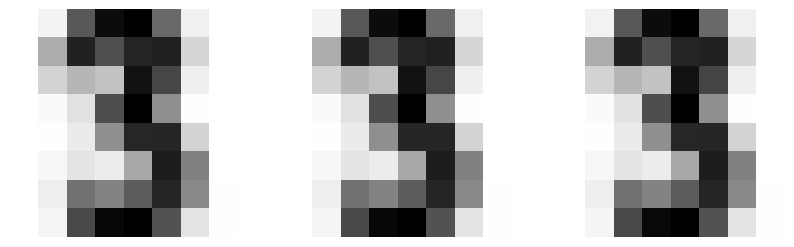

In [3]:
y_hat = enc.predict(rng.random((3, 64)))
fig, axs = plt.subplots(1, 3, figsize=(10, 7))
for i in range(3):
    axs.flat[i].imshow(y_hat[i].reshape(8, 8), cmap="binary")
    axs.flat[i].axis("off")

The output suggests that it is the autoencoder that now understands
how a digit $3$ looks.
In other words we have a model that understand the inherent concepts
of how a digit three looks.
None of the images predicted exist in the dataset,
it was the autoencoder itself that did draw them.

We can perform something similar on the digit $6$.

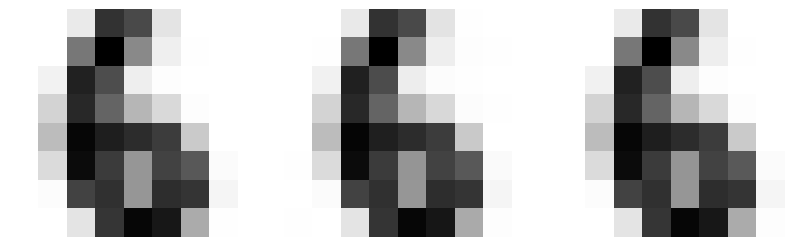

In [4]:
enc6 = MLPRegressor(
    hidden_layer_sizes=(128, 8, 128),
    activation="tanh",
    learning_rate_init=0.0001,
    max_iter=1500,
    tol=0.001,
)
X6 = digits.data[digits.target == 6]
enc6.fit(X6, X6)
y_hat = enc6.predict(rng.random((3, 64)))
fig, axs = plt.subplots(1, 3, figsize=(10, 7))
for i in range(3):
    axs.flat[i].imshow(y_hat[i].reshape(8, 8), cmap="binary")
    axs.flat[i].axis("off")

The features inside the layer with only $8$ neurons compress the images
in the entire dataset (of digit $6$ in this case) into an efficient representation.
Such a representation is often non-linear and produces non-linear features.
It is due to this efficient representation training that a deep NN
(a NN with more than one hidden layer) can build features from the raw data.
The bad side is that one needs a lot of data and training time
in order to find such an efficient representation.

In a real problem we would need a model that can identify more than a single class.
Since we do not need machine learning to identify a single class in the first place.
We will take three digits $2$, $5$ and $9$ and build an
autoencoder that understand all of them.

In [5]:
X259 = digits.data[
    (digits.target == 2) | (digits.target == 5) | (digits.target == 9)
]
y259 = digits.target[
    (digits.target == 2) | (digits.target == 5) | (digits.target == 9)
]
y259[:10]

array([2, 5, 9, 2, 5, 9, 2, 5, 9, 9])

This is really the limit of `sklearn`.
In a library meant for NNs one would be capable of defining different activation
functions for different layers, which would considerably help the NN performance.
Many libraries are also more efficient at calculating derivatives
and can even perform the training inside a Graphics Processing Unit (GPU),
which has optimized hardware for the matrix operations a NN requires.

Still we can get some results from `sklearn` itself,
just note that the following will take a really long time to run.

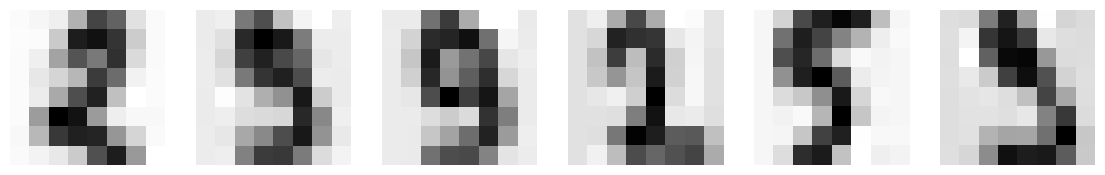

In [6]:
enc259 = MLPRegressor(
    hidden_layer_sizes=(128, 8, 128),
    activation="tanh",
    learning_rate_init=0.0001,
    max_iter=15000,
    tol=0.0001,
)
enc259.fit(X259, X259)
y_hat = enc259.predict(X259[:6])
fig, axs = plt.subplots(1, 6, figsize=(14, 7))
for i in range(6):
    axs.flat[i].imshow(y_hat[i].reshape(8, 8), cmap="binary")
    axs.flat[i].axis("off")

![Photo](ol-photo.svg)

<div style="text-align:right;"><sup>ol-photo.svg</sup></div>

## Extra: Metaphysics Time and Artificial Intelligence

Metaphysics are often a debated subject but we will delve into it a bit
to find some explanation as to why we often call machine learning
to be artificial intelligence.
And we are able to do it based on the last example.
In the previous autoencoder we managed to build a model which
*understands* three concepts: $2$, $5$ and $9$.
And we will argue that because of that this autoencoder
has an idea of the passing of time.

One definition of artificial intelligence is whether a system
operating against a human can fool the human into believing
that the system is a human being.
This is quick summary of the *Turing Test*.
Unfortunately the Turing Test has been proven insufficient by internet chat bots,
which are capable of passing the test - fooling a human - without
making any use of machine learning.
Since then we are struggling to better define artificial intelligence.

A different way of describing whether a system is intelligent is to
explore the concept of our own intelligence.
We humans often argue that our intelligence is the capacity of laying
our experience on a time line.
Which means that intelligence requires the existence of time.
As obvious as that may seem at first,
the existence of time is not quite obvious once one looks deeper.
In physics we define time to exist if and only if there exist occurrences
that allow for this time to be counted.
In a universe where there is nothing to count the passage of time, time would not exist.
Note that the inner workings of your own mind are enough for you
to be capable of counting time through these occurrences.

We can apply a similar argument to our autoencoder and to the definition
of artificial intelligence.
Since the existence of intelligence requires the existence of time,
then the first step to achieve a system with artificial intelligence
is to have a system with enough understanding to be capable of measuring
the passage of time.
To be capable of counting time one requires at least three different
events: one baseline event, one event that changes from this baseline
which is used as the measuring stick, and a third event that can be
counted between the changes of the first two.

Out autoencoder cannot know how many times it was presented an image
of $2$ because it only exist whilst it is predicting.
But the autoencoder is capable of understanding that there was a change
from an image of $2$ to an image of $5$.
It cannot count how many images of $2$ and how many images of $5$ it has
seen because it cannot count time.
But our autoencoder can notice a switch from $2$ to $5$, this gives it a measuring stick.
Finally, our autoencoder can count whether a $9$ did appear between a change
from $2$ to $5$ (or $5$ to $2$) or whether a $9$ did not appear.
We therefore argue that the autoencoder has enough "intelligence"
to be capable of counting the passage of time, the most basic "intelligence" as argued by metaphysics.